## 1. Import Necessary Libraries

In [49]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [3]:
wine_data=load_wine()

In [4]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [7]:
wine_dataset=pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_dataset['target']=wine_data.target
wine_dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 3. Data Understanding

In [8]:
wine_dataset.shape

(178, 14)

In [9]:
wine_dataset.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [10]:
wine_dataset.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [11]:
wine_dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 4. Model Building

In [14]:
X=wine_dataset.drop('target', axis=1)
y=wine_dataset[['target']]

In [15]:
X.shape, y.shape

((178, 13), (178, 1))

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=12, stratify=y, shuffle=True )

In [17]:
X_train.shape, y_train.shape

((142, 13), (142, 1))

In [18]:
X_test.shape, y_test.shape

((36, 13), (36, 1))

## 5. Model Training || 6. Model Testing || 7. Model Evaluation

### For k=3

In [22]:
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred=knn_classifier.predict(X_train)
print('Accuracy Score:', round(accuracy_score(y_train, y_pred),4))

Accuracy Score: 0.8239


### For k=5

In [23]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred=knn_classifier.predict(X_train)
print('Accuracy Score:', round(accuracy_score(y_train, y_pred),4))

Accuracy Score: 0.7606


### For k=7

In [24]:
knn_classifier=KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

y_pred=knn_classifier.predict(X_train)
print('Accuracy Score:', round(accuracy_score(y_train, y_pred),4))

Accuracy Score: 0.7535


### For k=9

In [25]:
knn_classifier=KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

y_pred=knn_classifier.predict(X_train)
print('Accuracy Score:', round(accuracy_score(y_train, y_pred),4))

Accuracy Score: 0.7676


## APPLY STANDARDIZATION as it is working on DISTANCE based concept

In [28]:
std_scalar=StandardScaler()
std_scalar=std_scalar.fit_transform(X)
X_scaled=pd.DataFrame(std_scalar, columns=X.columns)
X_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [29]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=12, stratify=y, shuffle=True )

In [30]:
X_train.shape, y_train.shape

((142, 13), (142, 1))

In [31]:
X_test.shape, y_test.shape

((36, 13), (36, 1))

## 5. Model Training || 6. Model Testing || 7. Model Evaluation

### For k=3

In [33]:
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred=knn_classifier.predict(X_train)
print('Accuracy Score:', round(accuracy_score(y_train, y_pred),4))

Accuracy Score: 0.9718


### For k=5

In [34]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred=knn_classifier.predict(X_train)
print('Accuracy Score:', round(accuracy_score(y_train, y_pred),4))

Accuracy Score: 0.9789


### For k=7

In [35]:
knn_classifier=KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

y_pred=knn_classifier.predict(X_train)
print('Accuracy Score:', round(accuracy_score(y_train, y_pred),4))

Accuracy Score: 0.9789


### For k=9

In [36]:
knn_classifier=KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

y_pred=knn_classifier.predict(X_train)
print('Accuracy Score:', round(accuracy_score(y_train, y_pred),4))

Accuracy Score: 0.9718


## How to choose the Optimal number for neighbors??

In [51]:
kfold=KFold(n_splits=5, shuffle=True, random_state=14)
cv_scores=[]
for i in range(1,31,2):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    cval_scores=cross_val_score(estimator=knn_model, X=X_scaled, y=y, cv=kfold)
    print(i,'th Iteration\n', cval_scores.mean().round(4))
    cv_scores.append(cval_scores.mean().round(4))

1 th Iteration
 0.9608
3 th Iteration
 0.9606
5 th Iteration
 0.9608
7 th Iteration
 0.9663
9 th Iteration
 0.9663
11 th Iteration
 0.9608
13 th Iteration
 0.9608
15 th Iteration
 0.9608
17 th Iteration
 0.9606
19 th Iteration
 0.9606
21 th Iteration
 0.9663
23 th Iteration
 0.9721
25 th Iteration
 0.9721
27 th Iteration
 0.9721
29 th Iteration
 0.9721


In [52]:
cv_scores

[0.9608,
 0.9606,
 0.9608,
 0.9663,
 0.9663,
 0.9608,
 0.9608,
 0.9608,
 0.9606,
 0.9606,
 0.9663,
 0.9721,
 0.9721,
 0.9721,
 0.9721]

In [53]:
max(cv_scores)

0.9721

In [54]:
cv_scores.index(max(cv_scores))

11

### Using Visuals

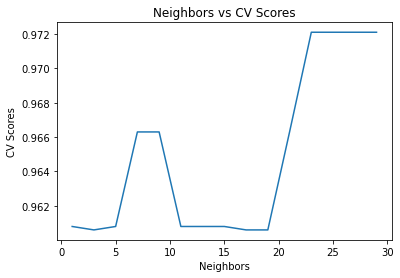

In [55]:
plt.plot(range(1,31,2), cv_scores)
plt.title('Neighbors vs CV Scores')
plt.xlabel('Neighbors')
plt.ylabel('CV Scores')
plt.show()

## The END!!!